Homework #2

Task 1

Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [1]:
import numpy as np

a = np.random.random((10, 3))
print(a)
print(a[np.arange(10), np.argmin(abs(a - 0.5) ,axis = 1)])

[[0.66450197 0.03959879 0.32071832]
 [0.73986348 0.44120744 0.87499074]
 [0.98965708 0.96223723 0.42282624]
 [0.46710484 0.98174618 0.38222711]
 [0.48069637 0.89779104 0.21376904]
 [0.61448003 0.53353432 0.1869836 ]
 [0.12885047 0.53748855 0.74770507]
 [0.94878087 0.2407366  0.88626011]
 [0.78529084 0.55901493 0.9122763 ]
 [0.63095018 0.84458015 0.99144059]]
[0.66450197 0.44120744 0.42282624 0.46710484 0.48069637 0.53353432
 0.53748855 0.2407366  0.55901493 0.63095018]


Task 2

Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [2]:
import numpy as np

a = np.random.random((6, 6))
print(np.sum(a, axis = 1) / np.min(a, axis = 0))

[15.79979708  9.17175585 24.52605311 19.49017425 15.10002251 54.40442086]


Task 3

На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [3]:
import numpy as np

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(np.max(x[1:][(x == 0)[:-1]]))

5


Task 4

Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [4]:
import numpy as np

x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x + np.bincount(i, minlength = len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


Task 5

Написать функцию, реализующую алгоритм k-means. 
Входные и выходные значения функции должны быть аналогичны 
https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. 
Функция должна содержать только один цикл while (for).

In [5]:
def my_whiten(features):
    #return (features - features.mean(axis = 0)) / features.std(axis = 0)
    return features / features.std(axis = 0)

In [6]:
import numpy as np
from scipy.spatial import distance

def my_kmeans(obs, k_or_guess, thresh = 1e-05): #k_or_guess -- int or ndarray
    
    if type(k_or_guess) == int and int(k_or_guess) > 0:
        book = obs[np.random.choice(obs.shape[0], size = k_or_guess, replace = False)]
    else:
        book = k_or_guess
    
    prev_diff = np.inf
    cur_diff = np.mean(np.min(distance.cdist(obs, book, 'euclidean'), axis=1))
    while abs(prev_diff - cur_diff) > thresh:
        new_book = np.empty(book.shape)
        dist = distance.cdist(obs, book, 'euclidean')
        tmp = np.hstack((obs, np.argmin(dist, axis = 1).reshape(len(dist),1)))
        for i in range(len(book)):
            new_book[i] = np.vstack(row for row in tmp if row[-1] == i).mean(axis=0)[:-1]
        book = new_book   
        prev_diff = cur_diff
        cur_diff = np.mean(np.min(distance.cdist(obs, book, 'euclidean'), axis=1))
        
    return book, cur_diff
        
        

Examples of working for k-means

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
features = np.array([[1.9, 2.3, 1.7],
                     [1.5, 2.5, 2.2],
                     [0.8, 0.6, 1.7,]])
whitened = my_whiten(features)
book = np.array((whitened[0], whitened[2]))
print(my_kmeans(whitened, book))

(array([[3.73950143, 2.81542279, 8.27314934],
       [1.75976538, 0.7038557 , 7.21248917]]), 0.7695048494502253)


In [9]:
features  = np.array([[ 1.9,2.3],
                      [ 1.5,2.5],
                      [ 0.8,0.6],
                      [ 0.4,1.8],
                      [ 0.1,0.1],
                      [ 0.2,1.8],
                      [ 2.0,0.5],
                      [ 0.3,1.5],
                      [ 1.0,1.0]])
whitened = my_whiten(features)
book = np.array((whitened[0],whitened[2]))
my_kmeans(whitened,book)

(array([[2.45121811, 3.03653641],
        [0.98872663, 1.31944737]]), 0.9088234961964715)

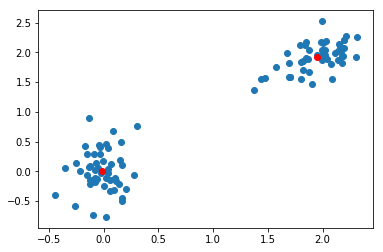

In [10]:
import matplotlib.pyplot as plt

pts = 50
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10], [[10, 2], [2, 1]], size=pts)
features = np.concatenate((a, b))
whitened = my_whiten(features)
codebook, distortion = my_kmeans(whitened, 2)
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

Task 6

С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

def elbow_method(obs):
    dist = []
    for i in range(1, 16):
        dist.append(my_kmeans(obs, i)[1])
    plt.figure(figsize = (10, 6))
    plt.plot(range(1, 16), dist, 'ro-', label = "Elbow method")
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.legend()
    plt.show()

Data standartization 

In [12]:
def standartization(features):
    return (features - features.mean(axis = 0)) / features.std(axis = 0)

In [13]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
print(data[:5])
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
print(data[:5])
std_data = standartization(data[:,2:])
print(np.hstack((data[:, :2], std_data))[:5])
#data format: Id, Genre, Age, Annual Income (k$), Spending Score (1-100)
#std_data format: Age, Annual Income, Spending Score

[['0001' 'Male' '19' '15' '39']
 ['0002' 'Male' '21' '15' '81']
 ['0003' 'Female' '20' '16' '6']
 ['0004' 'Female' '23' '16' '77']
 ['0005' 'Female' '31' '17' '40']]
[[ 1.  1. 19. 15. 39.]
 [ 2.  1. 21. 15. 81.]
 [ 3.  0. 20. 16.  6.]
 [ 4.  0. 23. 16. 77.]
 [ 5.  0. 31. 17. 40.]]
[[ 1.          1.         -1.42456879 -1.73899919 -0.43480148]
 [ 2.          1.         -1.28103541 -1.73899919  1.19570407]
 [ 3.          0.         -1.3528021  -1.70082976 -1.71591298]
 [ 4.          0.         -1.13750203 -1.70082976  1.04041783]
 [ 5.          0.         -0.56336851 -1.66266033 -0.39597992]]


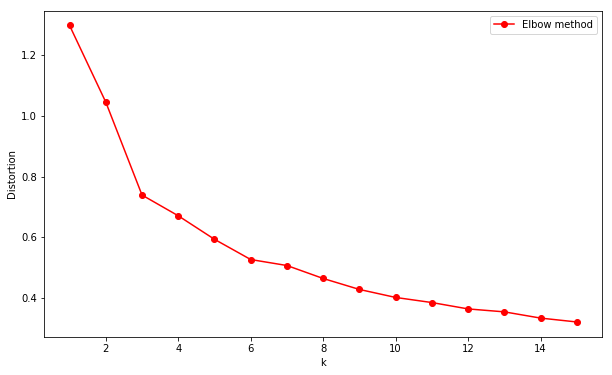

In [15]:
#Age -- Income

elbow_method(std_data[:, [0, 1]])

Возьмём k = 3

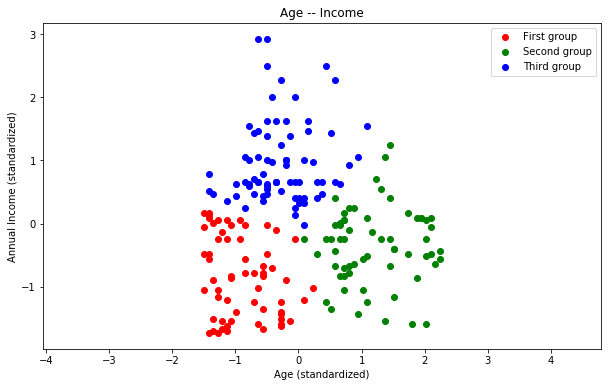

In [16]:
codebook, dist = my_kmeans(std_data[:, [0, 1]], 3)
distortion = distance.cdist(std_data[:,[0, 1]], codebook, 'euclidean')
matrix = np.hstack((std_data[:,[0,1]], np.argmin(distortion, axis = 1).reshape(len(distortion), 1)))
group1 = np.vstack(row for row in matrix if row[-1] == 0)
group2 = np.vstack(row for row in matrix if row[-1] == 1)
group3 = np.vstack(row for row in matrix if row[-1] == 2)


plt.figure(figsize = (10, 6))
plt.scatter(group1[:, 0], group1[:, 1], c = 'r', label = 'First group')
plt.scatter(group2[:, 0], group2[:, 1], c = 'g', label = 'Second group')
plt.scatter(group3[:, 0], group3[:, 1], c = 'b', label = 'Third group')
plt.axis('equal')
plt.title('Age -- Income')
plt.xlabel("Age (standardized)")
plt.ylabel('Annual Income (standardized)')
plt.legend()
plt.show()

Из разбиения по кластерам видно, что наибольший доход имеют люди среднего возраста

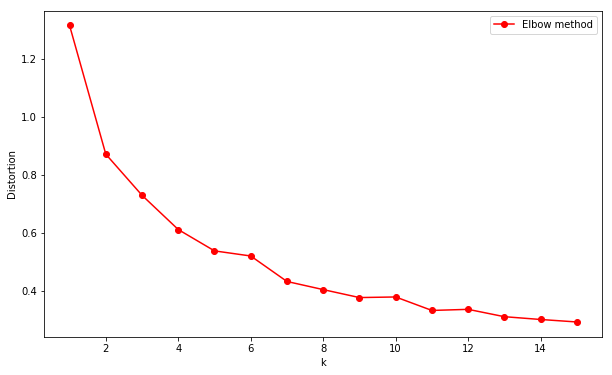

In [17]:
#Age -- Spending Score

elbow_method(std_data[:, [0, 2]])

Возьмём k = 4

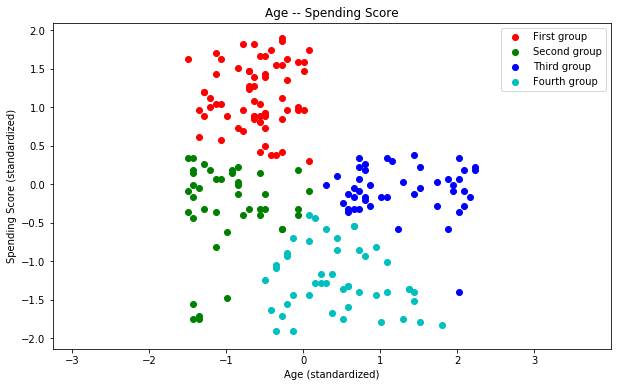

In [18]:
codebook, dist = my_kmeans(std_data[:, [0, 2]], 4)
distortion = distance.cdist(std_data[:,[0, 2]], codebook, 'euclidean')
matrix = np.hstack((std_data[:,[0, 2]], np.argmin(distortion, axis = 1).reshape(len(distortion), 1)))
group1 = np.vstack(row for row in matrix if row[-1] == 0)
group2 = np.vstack(row for row in matrix if row[-1] == 1)
group3 = np.vstack(row for row in matrix if row[-1] == 2)
group4 = np.vstack(row for row in matrix if row[-1] == 3)


plt.figure(figsize = (10, 6))
plt.scatter(group1[:, 0], group1[:, 1], c = 'r', label = 'First group')
plt.scatter(group2[:, 0], group2[:, 1], c = 'g', label = 'Second group')
plt.scatter(group3[:, 0], group3[:, 1], c = 'b', label = 'Third group')
plt.scatter(group4[:, 0], group4[:, 1], c = 'c', label = 'Fourth group')
plt.axis('equal')
plt.title('Age -- Spending Score')
plt.xlabel("Age (standardized)")
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.show()

Заметно что молодые люди тратят больше, нежели люди старше. При этом высокие траты наблюдаются лишь до некоторого предельного возраста

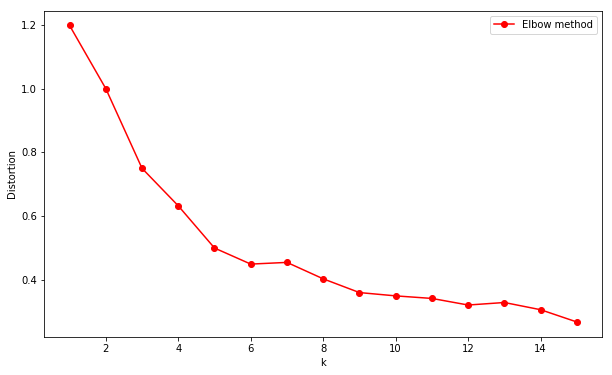

In [19]:
#Income -- Spending Score

elbow_method(std_data[:, [1, 2]])

Возьмём k = 5

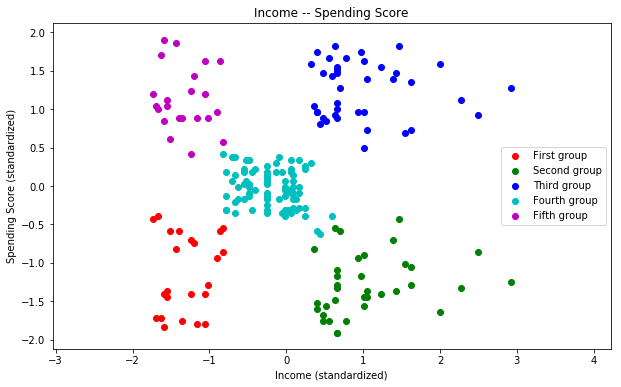

In [20]:
codebook, dist = my_kmeans(std_data[:, [1, 2]], 5)
distortion = distance.cdist(std_data[:,[1, 2]], codebook, 'euclidean')
matrix = np.hstack((std_data[:,[1, 2]], np.argmin(distortion, axis = 1).reshape(len(distortion), 1)))
group1 = np.vstack(row for row in matrix if row[-1] == 0)
group2 = np.vstack(row for row in matrix if row[-1] == 1)
group3 = np.vstack(row for row in matrix if row[-1] == 2)
group4 = np.vstack(row for row in matrix if row[-1] == 3)
group5 = np.vstack(row for row in matrix if row[-1] == 4)


plt.figure(figsize = (10, 6))
plt.scatter(group1[:, 0], group1[:, 1], c = 'r', label = 'First group')
plt.scatter(group2[:, 0], group2[:, 1], c = 'g', label = 'Second group')
plt.scatter(group3[:, 0], group3[:, 1], c = 'b', label = 'Third group')
plt.scatter(group4[:, 0], group4[:, 1], c = 'c', label = 'Fourth group')
plt.scatter(group5[:, 0], group5[:, 1], c = 'm', label = 'Fifth group')
plt.axis('equal')
plt.title('Income -- Spending Score')
plt.xlabel("Income (standardized)")
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.show()

Из 5 выделенных групп наиболее многочисленной оказалась группа со средним доходом и средним покупательским индексом. Остальные группы имеют меньшее количество людей и имеют характерные крайности (низкий/высокий доход, низкий/высокий покупательскимй индекс)